# 15. Prediction

In [54]:
path_data = '../../data/'
import numpy as np
from datascience import *
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [57]:
### Table() creates an empty table; this is a function by itself
### Table.read_table() creates a table by reading the CSV file

### when read_table() from *.csv, so Table.read_table() should be used;
### but Table().read_table() would work the same

##### the following two lines do the same
# original = Table().read_table(path_data + 'family_heights.csv')
original = Table.read_table(path_data + 'family_heights.csv')
original

family,father,mother,midparentHeight,children,childNum,sex,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [50]:
heights = Table().with_columns(
    'MidParent', original.column('midparentHeight'), 
    'Child', original.column('childHeight')
)
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


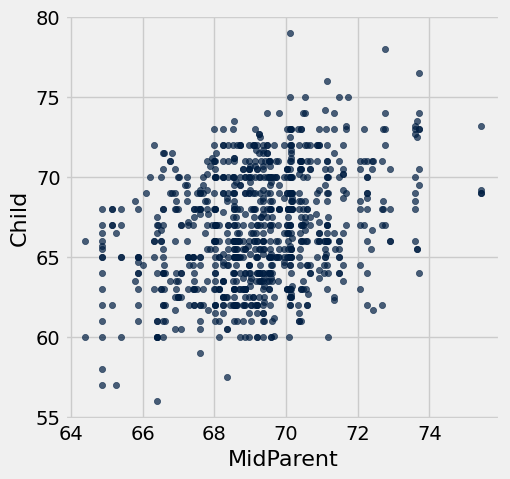

In [51]:
heights.scatter('MidParent')

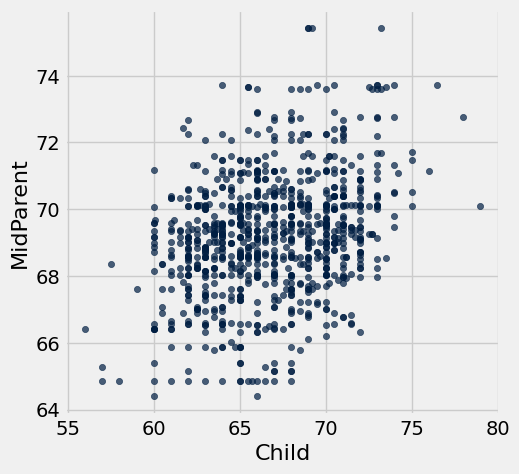

In [53]:
heights.scatter('Child')

- predict the adult height of a child born to parents

In [60]:
##### defining a function to 
##### "predict" child height from mid-parent-height
### we are speculating that child-height may be around the avg-height of both parents
### the argument is one "MidParent"height. for each MidParent height, get from the heights table
### all rows with MidParent heights that are -0.5 to +0.5 of the Midparent height, then take  
### the mean of the Child height.

def predict_child(mpht):
    close_points = heights.where(
        'MidParent', are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('Child').mean()

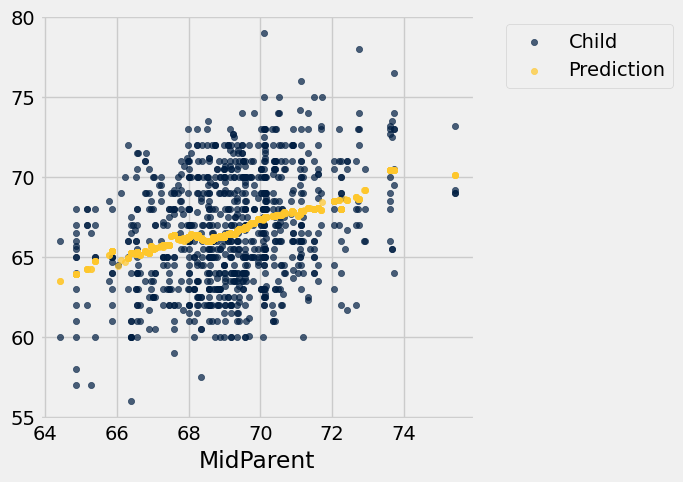

In [61]:
##### # Apply predict_child to all the midparent heights
### for each point, do predict_child() and make it a new column

heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
)
### now draw a scatter plot of the predicted values
heights_with_predictions.scatter("MidParent")

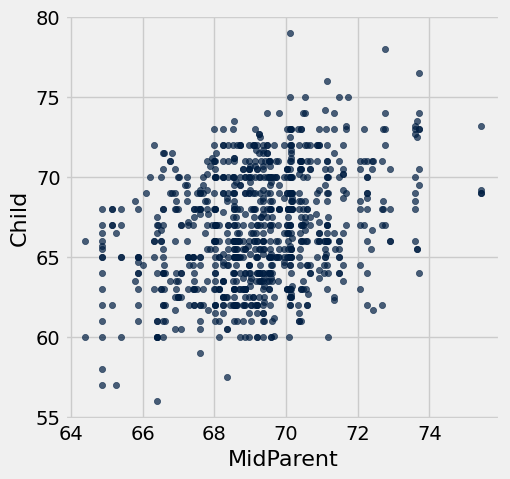

In [68]:
heights.scatter('MidParent')

In [66]:
heights_with_predictions

MidParent,Child,Prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


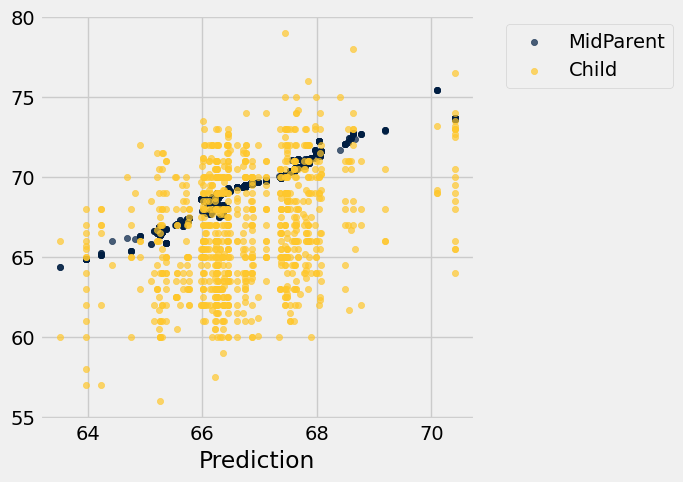

In [70]:
heights_with_predictions.scatter('Prediction')